4H4. Plot the prior predictive distribution for the parabolic polynomial regression model in the chapter. You can modify the code that plots the linear regression prior predictive distribution. Can you modify the prior distributions of α, β1, and β2 so that the prior predictions stay within the biologically reasonable outcome space? That is to say: Do not try to fit the data by hand. But do try to keep the curves consistent with what you know about height and weight, before seeing these exact data.

In [ ]:
#in book we have:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import scipy.stats as stats


d = pd.read_csv('static/Howell1.csv', sep=';')
d["weight_std"] = (d.weight - d.weight.mean()) / d.weight.std()
d["weight_std2"] = d.weight_std**2

weight_m = np.vstack((d.weight_std, d.weight_std**2, d.weight_std**3))
weight_m 

with pm.Model() as m_4_6:
    a = pm.Normal("a", mu=178, sigma=100)
    b = pm.Normal("b", mu=0, sigma=10, shape=3)
    sigma = pm.Uniform("sigma", lower=0, upper=50)
    mu = pm.Deterministic("mu", a + pm.math.dot(b, weight_m))
    height = pm.Normal("height", mu=mu, sigma=sigma, observed=d.height.values)
    trace_4_6 = pm.sample(1000, tune=1000)

Initializing NUTS using jitter+adapt_diag...


/app/data/.local/lib/python3.12/site-packages/pytensor/link/c/cmodule.py:2968: UserWarning: PyTensor could not link to a BLAS installation. Operations that might benefit from BLAS will be severely degraded.
This usually happens when PyTensor is installed via pip. We recommend it be installed via conda/mamba/pixi instead.
Alternatively, you can use an experimental backend such as Numba or JAX that perform their own BLAS optimizations, by setting `pytensor.config.mode == 'NUMBA'` or passing `mode='NUMBA'` when compiling a PyTensor function.
For more options and details see https://pytensor.readthedocs.io/en/latest/troubleshooting.html#how-do-i-configure-test-my-blas-library
  warnings.warn(


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [a, b, sigma]


/usr/local/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.


In [ ]:
weight_m = np.vstack((d.weight_std, d.weight_std**2, d.weight_std**3))
weight_m 

with pm.Model() as m_4_6:
    a = pm.Normal("a", mu=178, sigma=100)
    b1 = pm.Lognormal("b1", mu=0, sigma=1)
    b2 = pm.Normal("b2", mu=0, sigma=10)
    b3 = pm.Normal("b3", mu=0, sigma=10)
    sigma = pm.Uniform("sigma", lower=0, upper=50)
    mu = pm.Deterministic("mu", a + b1*weight_m[0] + b2*weight_m[1] + b3*weight_m[2])
    height = pm.Normal("height", mu=mu, sigma=sigma, observed=d.height.values)
    trace_4_6 = pm.sample(1000, tune=1000)

Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [a, b1, b2, b3, sigma]


/usr/local/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.


In [ ]:
with m_4_6:
    prior_samples = pm.sample_prior_predictive(1000)

Sampling: [a, b1, b2, b3, height, sigma]


In [ ]:
a_samples = prior_samples.prior.a.values[0, :] 
b1_samples = prior_samples.prior.b1.values[0, :]  
b2_samples = prior_samples.prior.b2.values[0, :] 
b3_samples = prior_samples.prior.b3.values[0, :]

In [ ]:
prior_samples.prior_predictive.height_dim_0

<xarray.DataArray 'height_dim_0' (height_dim_0: 544)> Size: 4kB
array([  0,   1,   2, ..., 541, 542, 543])
Coordinates:
  * height_dim_0  (height_dim_0) int64 4kB 0 1 2 3 4 5 ... 539 540 541 542 543

In [ ]:
a_prior_hdi = az.hdi(a_samples, hdi_prob=0.97)
a_prior_hdi

array([-52.13449952, 376.82785365])

In [ ]:
b1_prior_hdi = az.hdi(b1_samples, hdi_prob=0.97)
b1_prior_hdi

array([0.03465117, 6.80950161])

In [ ]:
b2_prior_hdi = az.hdi(b2_samples, hdi_prob=0.97)
b2_prior_hdi

array([-21.27244983,  22.58173921])

In [ ]:
b3_prior_hdi = az.hdi(b3_samples, hdi_prob=0.97)
b3_prior_hdi

array([-21.91159535,  18.8092816 ])

**AI Prompt**

I should change priors but how? make them tighter?

**AI Response**

Great question! You're on the right track thinking about making priors tighter, but let's think about this systematically.

First, let's visualize what your current priors are producing. Can you create a plot showing some prior predictive curves? This will help us see if they're biologically reasonable for height-weight relationships.

Try plotting a few sample curves from your prior - maybe 50-100 lines showing the relationship between standardized weight and predicted height. What do you think we should be looking for in terms of "biologically reasonable"?

Once we see the current prior predictions, we can discuss which specific priors might need adjustment and in what direction.



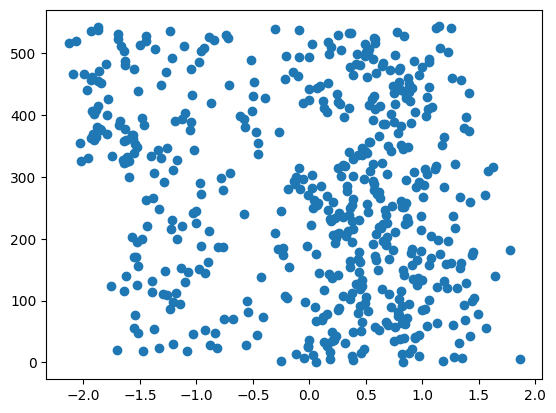

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(d['weight_std'], prior_samples.prior_predictive.height_dim_0)

**AI Prompt**

like so?

**AI Response**

That's a good start! You're plotting the prior predictive samples, but this shows all the individual height predictions as points rather than the curves themselves. 

What we really want to see is how the *relationship* between weight and height looks under your priors. Try plotting some actual curves instead - maybe something like:

```python
# Plot some prior predictive curves
plt.figure(figsize=(10, 6))
weight_seq = np.linspace(-2, 2, 100)
# Then plot several curves using your prior samples
```

This will help us see if the curves are doing reasonable things like:
- Generally increasing (heavier people tend to be taller)
- Not having extreme slopes or wild oscillations
- Staying within plausible height ranges

Can you modify your plot to show the actual curves? Then we can discuss what looks biologically unreasonable.



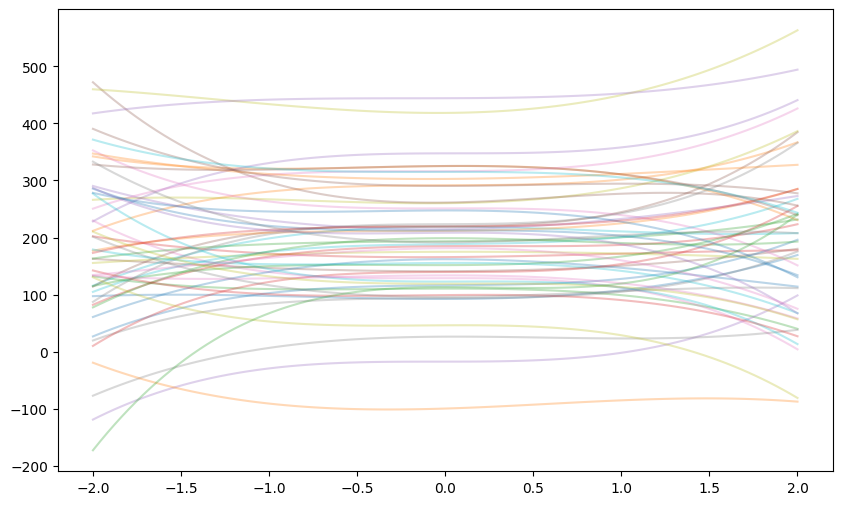

In [ ]:
weight_seq = np.linspace(-2, 2, 100)

plt.figure(figsize=(10, 6))
for i in range(50):  # plot first 50 curves
    heights = a_samples[i] + b1_samples[i]*weight_seq + b2_samples[i]*weight_seq**2 + b3_samples[i]*weight_seq**3
    plt.plot(weight_seq, heights, alpha=0.3)

**AI Prompt**

so these are too wide?

**AI Response**

Exactly! Now you can see the problem clearly. Look at what's happening:

1. **Negative heights**: Some curves go below 0, which is impossible for human height
2. **Extreme heights**: Some curves reach 500+ cm (that's over 16 feet tall!)
3. **Wild shapes**: Some curves have strange U-shapes or dramatic swoops

For human height-weight relationships, we'd expect:
- Heights roughly between 100-200 cm for most people
- Generally positive relationship (heavier → taller, mostly)
- Smooth, reasonable curves

Which specific priors do you think are causing these problems? Look at your HDI ranges - which parameters have ranges that seem too wide for realistic height-weight relationships?



**AI Prompt**

b2 and b3

**AI Response**

Good observation! Yes, b2 and b3 are causing those wild oscillations and extreme shapes. With ranges of roughly ±20 for both, they can create dramatic curvature.

For a height-weight relationship, the quadratic and cubic terms should probably be much smaller - maybe just fine-tuning around a mostly linear relationship.

What do you think would be reasonable standard deviations for b2 and b3? Consider that these are higher-order terms that should have subtle effects, not dramatic ones.



**AI Prompt**

maybe sigma=1

**AI Response**

That sounds like a good starting point! Sigma=1 would give you much tighter control over those higher-order terms.

Try updating your model with `pm.Normal("b2", mu=0, sigma=1)` and `pm.Normal("b3", mu=0, sigma=1)`, then sample the prior predictive again and plot the curves.

What do you expect to see with these tighter priors?



In [ ]:
weight_m = np.vstack((d.weight_std, d.weight_std**2, d.weight_std**3))
weight_m 

with pm.Model() as m_4_6:
    a = pm.Normal("a", mu=178, sigma=10)
    b1 = pm.Lognormal("b1", mu=0, sigma=1)
    b2 = pm.Normal("b2", mu=0, sigma=1)
    b3 = pm.Normal("b3", mu=0, sigma=1)
    sigma = pm.Uniform("sigma", lower=0, upper=50)
    mu = pm.Deterministic("mu", a + b1*weight_m[0] + b2*weight_m[1] + b3*weight_m[2])
    height = pm.Normal("height", mu=mu, sigma=sigma, observed=d.height.values)
    trace_4_6 = pm.sample(1000, tune=1000)

Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [a, b1, b2, b3, sigma]


/usr/local/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.


In [ ]:
with m_4_6:
    prior_samples = pm.sample_prior_predictive(1000)

Sampling: [a, b1, b2, b3, height, sigma]


In [ ]:
a_samples = prior_samples.prior.a.values[0, :] 
b1_samples = prior_samples.prior.b1.values[0, :]  
b2_samples = prior_samples.prior.b2.values[0, :] 
b3_samples = prior_samples.prior.b3.values[0, :]

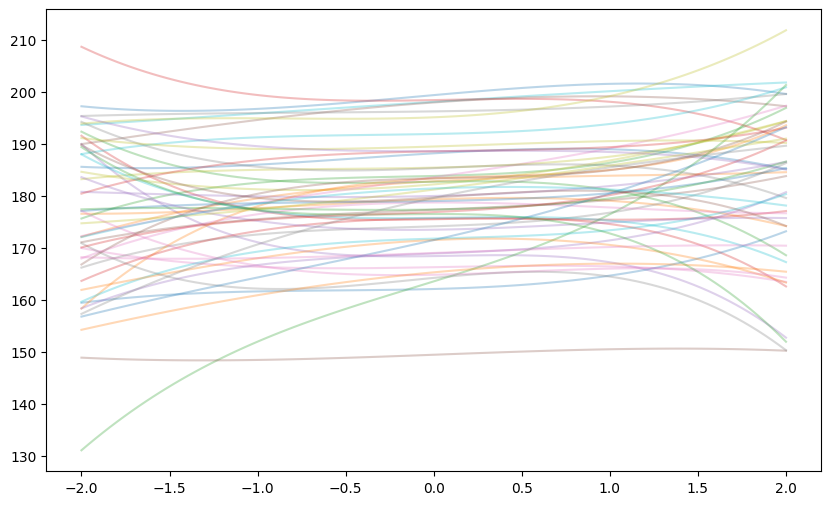

In [ ]:
weight_seq = np.linspace(-2, 2, 100)

plt.figure(figsize=(10, 6))
for i in range(50):  # plot first 50 curves
    heights = a_samples[i] + b1_samples[i]*weight_seq + b2_samples[i]*weight_seq**2 + b3_samples[i]*weight_seq**3
    plt.plot(weight_seq, heights, alpha=0.3)

**AI Prompt**

this is better I think

**AI Response**

Much better! Now you have curves that stay within a reasonable height range (roughly 130-210 cm) and show more biologically plausible relationships. No more negative heights or 16-foot-tall people!

I notice you also tightened the prior on `a` (the intercept) from sigma=100 to sigma=10. That was a good move too - it keeps the average height centered around 178 cm without wild variation.

Do these curves look like reasonable prior beliefs about how height and weight might relate before seeing the data? Are there any other adjustments you'd consider making?



4H5.  Return to data(cherry_blossoms) and model the association between blossom date (doy) and March temperature (temp). Note that there are many missing values in both variables. You may consider a linear model, a polynomial, or a spline on temperature. How well does temperature trend predict the blossom trend?

In [ ]:
d = pd.read_csv("static/cherry_blossoms.csv", sep=';')
# nans are not treated as in the book
az.summary(d.dropna().to_dict(orient="list"), kind="stats")

,mean,sd,hdi_3%,hdi_97%
year,1533.395,291.123,1016.00,1978.00
doy,104.921,6.258,92.00,115.00
temp,6.100,0.683,4.80,7.32
temp_upper,6.938,0.812,5.56,8.40
temp_lower,5.264,0.762,3.75,6.83


Text(0, 0.5, 'day of first blossom')

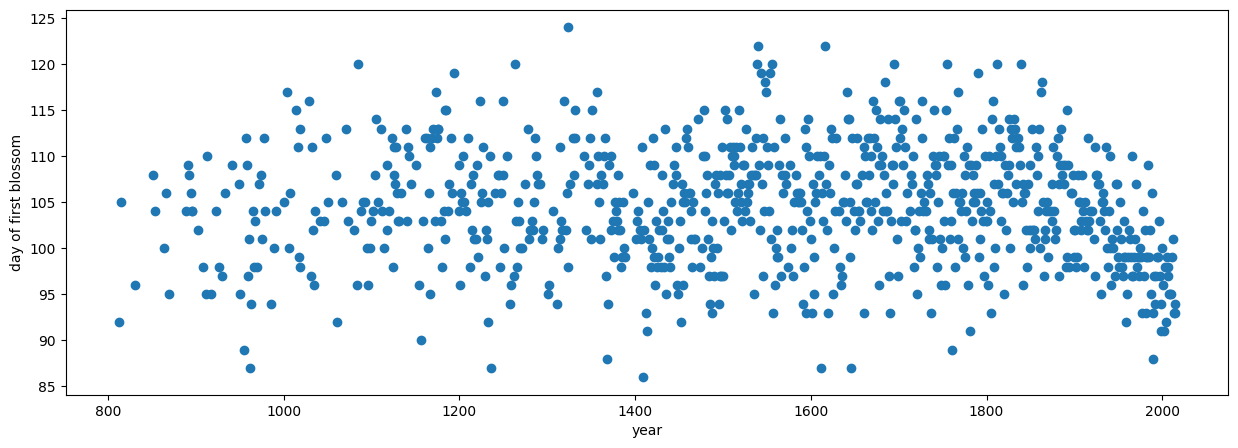

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.scatter(d.year, d.doy)
plt.xlabel("year")
plt.ylabel("day of first blossom")

Text(0, 0.5, 'day of first blossom')

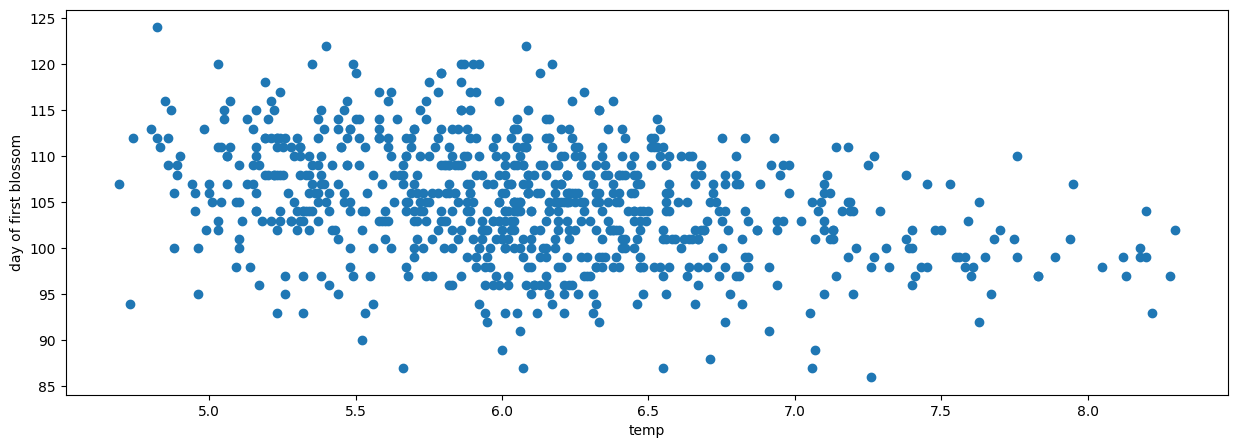

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.scatter(d.temp, d.doy)
plt.xlabel("temp")
plt.ylabel("day of first blossom")

**AI Prompt**

what model would be best ?

**AI Response**

Looking at your scatter plots, I can see some interesting patterns! 

From the temperature vs. blossom day plot, there appears to be a clear negative relationship - warmer March temperatures seem to lead to earlier blooming (lower day numbers). This makes biological sense.

For choosing a model, consider:

1. **Linear model** - Simple and interpretable. Does the relationship look roughly linear to you?

2. **Polynomial** - Could capture any curvature. Do you see any non-linear patterns?

3. **Spline** - Very flexible, good for complex relationships

What's your initial impression from the temp vs. doy plot? Does the relationship look mostly linear, or do you notice any curves or bends that might suggest a more complex model?

Also, how do you want to handle the missing data - should we work with complete cases only, or consider imputation?



**AI Prompt**

lets start with linear model. what are options for missing data besides removing?

**AI Response**

Good choice starting with linear! For missing data, you have several options besides just dropping rows:

1. **Imputation** - Fill in missing values with estimates (mean, median, regression-based)

2. **Model the missingness** - In PyMC, you can treat missing values as parameters to be estimated during sampling

3. **Multiple imputation** - Create several plausible datasets and combine results

4. **Use all available data** - Model each variable separately where it's observed

The PyMC approach (#2) is quite elegant - it will automatically estimate missing values as part of the Bayesian inference. This uses all your data and properly accounts for uncertainty in the missing values.

Which approach interests you most, or would you like to try the PyMC missing data handling?



**AI Prompt**

model missingness

**AI Response**

Great choice! PyMC can handle missing data elegantly by treating missing values as parameters to estimate.

The basic idea is that instead of removing rows with missing data, PyMC will:
- Use observed values where available
- Estimate missing values during sampling
- Properly propagate uncertainty from the missing values

For your cherry blossom data, you'd set up the model with missing values included, and PyMC automatically handles the rest.

Would you like to start building the linear model structure first, or do you want to explore how to specify the missing data handling in PyMC?



In [ ]:
d2 = d.dropna(subset=["doy", "temp"])

with pm.Model() as blossom_temp:
    a = pm.Normal("a", mu=100, sigma=10)
    b = pm.Normal("b", mu=0, sigma=1)
    mu = pm.Deterministic("mu", a + b*d2.temp.values)
    sigma = pm.Uniform("sigma", lower=0, upper=50)
    day = pm.Normal("day", mu=mu, sigma=sigma, observed=d2.doy.values)
    trace_blossom_temp = pm.sample(1000, tune=1000)

Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [a, b, sigma]


/usr/local/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.


In [ ]:
trace_blossom_temp

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

**AI Prompt**

I should sample posterior?

**AI Response**

You already did sample the posterior! That's what `pm.sample(1000, tune=1000)` did - it gave you 4000 posterior samples (1000 from each of 4 chains).

Looking at your results, the model found:
- `a` (intercept): around 121 days on average
- `b` (slope): around -2.6, meaning for each 1°C warmer March temperature, cherry blossoms bloom about 2.6 days earlier

This makes biological sense! Now you could:

1. **Examine the results** - look at parameter summaries with `az.summary(trace_blossom_temp)`
2. **Plot the fitted line** - show how well your linear model captures the relationship
3. **Compare models** - try the missing data approach or a polynomial model

Which would you like to explore first?



In [ ]:
az.summary(trace_blossom_temp)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,120.924,1.803,117.471,124.204,0.048,0.033,1427.0,1490.0,1.0
b,-2.625,0.293,-3.159,-2.070,0.008,0.005,1398.0,1503.0,1.0
sigma,5.932,0.147,5.669,6.213,0.003,0.003,1954.0,1880.0,1.0
mu[0],101.554,0.431,100.755,102.356,0.011,0.007,1547.0,1890.0,1.0
mu[1],104.074,0.232,103.630,104.499,0.004,0.003,3184.0,3206.0,1.0
...,...,...,...,...,...,...,...,...,...
mu[782],99.402,0.651,98.188,100.593,0.017,0.011,1445.0,1782.0,1.0
mu[783],99.349,0.657,98.123,100.546,0.017,0.011,1444.0,1774.0,1.0
mu[784],99.402,0.651,98.188,100.593,0.017,0.011,1445.0,1782.0,1.0
mu[785],99.192,0.674,97.944,100.426,0.018,0.012,1440.0,1726.0,1.0


**AI Prompt**

how to plot the fitted line?

**AI Response**

To plot the fitted line, you'll want to:

1. Create a sequence of temperature values to plot over
2. Use your posterior samples to generate predictions
3. Plot the original data points and the fitted line

Here's a start:

```python
# Create temperature sequence for plotting
temp_seq = np.linspace(d2.temp.min(), d2.temp.max(), 100)
```

Would you like to try creating the temperature sequence first, then we can work on getting the predictions and plotting?



<Figure size 1000x600 with 0 Axes>

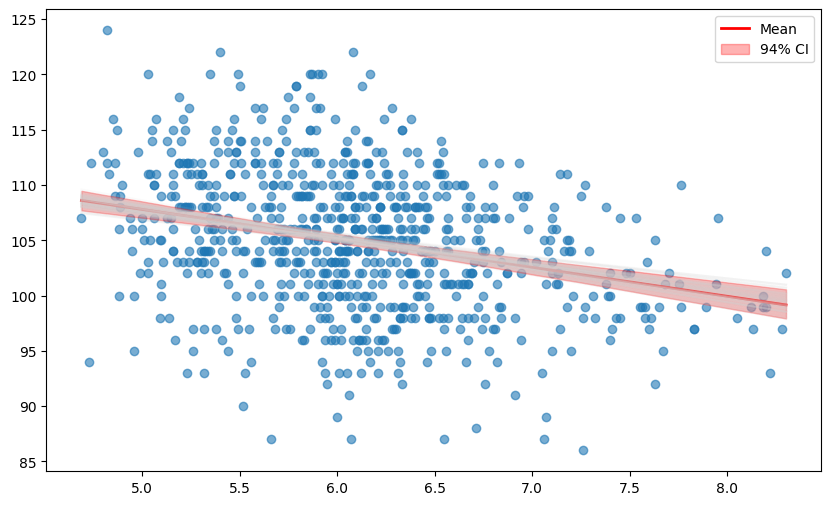

In [ ]:
temp_seq = np.linspace(d2.temp.min(), d2.temp.max(), 100)
a=trace_blossom_temp.posterior.a.values[0,:]
b=trace_blossom_temp.posterior.b.values[0,:]


plt.figure(figsize=(10, 6))
#plt.scatter(d2.temp, d2.doy, alpha=0.6)

# Calculate predictions for all posterior samples
predictions = a[:, np.newaxis] + b[:, np.newaxis] * temp_seq

# Calculate percentiles
mean_pred = np.mean(predictions, axis=0)
lower_ci = np.percentile(predictions, 3, axis=0)
upper_ci = np.percentile(predictions, 97, axis=0)

plt.figure(figsize=(10, 6))
plt.scatter(d2.temp, d2.doy, alpha=0.6)
plt.plot(temp_seq, mean_pred, 'red', linewidth=2, label='Mean')
plt.fill_between(temp_seq, lower_ci, upper_ci, alpha=0.3, color='red', label='94% CI')
plt.legend()
for i in range(100):  # plot first 50 curves
    days_blossom = a[i] + b[i]*temp_seq 
    plt.plot(temp_seq, days_blossom, alpha=0.1, color='lightgrey')

**AI Prompt**

confidence interval is pretty narrow compared to the spread of the data

**AI Response**

Exactly right! That's a key insight. The narrow confidence interval shows you're quite certain about the *average* relationship (the line), but there's still lots of variability around that line.

This is the difference between:
- **Uncertainty in the mean** (the narrow red band) - how well we know the average relationship
- **Prediction uncertainty** (the spread of actual data points) - how much individual observations vary around that average

The model is saying "I'm confident the average relationship is about -2.6 days per °C, but any individual year could still be quite far from that line."

Would you like to explore adding prediction intervals to show the full range where you'd expect future observations to fall?



In [ ]:
d2 = d.dropna(subset=["doy", "temp"])

with pm.Model() as blossom_temp_polyn:
    a = pm.Normal("a", mu=100, sigma=10)
    b1 = pm.Normal("b1", mu=0, sigma=1)
    b2 = pm.Normal("b2", mu=0, sigma=1)
    b3 = pm.Normal("b3", mu=0, sigma=1)
    mu = pm.Deterministic("mu", a + b1*d2.temp.values+ b2*d2.temp.values**2+b3*d2.temp.values**3)
    sigma = pm.Uniform("sigma", lower=0, upper=50)
    day = pm.Normal("day", mu=mu, sigma=sigma, observed=d2.doy.values)
    trace_blossom_temp_polyn = pm.sample(1000, tune=1000)

Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [a, b1, b2, b3, sigma]


/usr/local/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 35 seconds.


In [ ]:
az.summary(trace_blossom_temp_polyn)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,113.942,4.233,106.266,121.909,0.098,0.089,1849.0,1899.0,1.0
b1,0.275,0.977,-1.588,2.151,0.022,0.018,2035.0,2049.0,1.0
b2,-0.338,0.318,-0.941,0.264,0.009,0.006,1381.0,1565.0,1.0
b3,0.009,0.030,-0.044,0.070,0.001,0.001,1419.0,1614.0,1.0
sigma,5.939,0.150,5.664,6.229,0.003,0.003,2343.0,1909.0,1.0
...,...,...,...,...,...,...,...,...,...
mu[782],98.227,1.184,95.791,100.260,0.025,0.020,2318.0,2391.0,1.0
mu[783],98.157,1.209,95.817,100.383,0.025,0.020,2299.0,2437.0,1.0
mu[784],98.227,1.184,95.791,100.260,0.025,0.020,2318.0,2391.0,1.0
mu[785],97.944,1.286,95.413,100.263,0.027,0.022,2246.0,2468.0,1.0


<Figure size 1000x600 with 0 Axes>

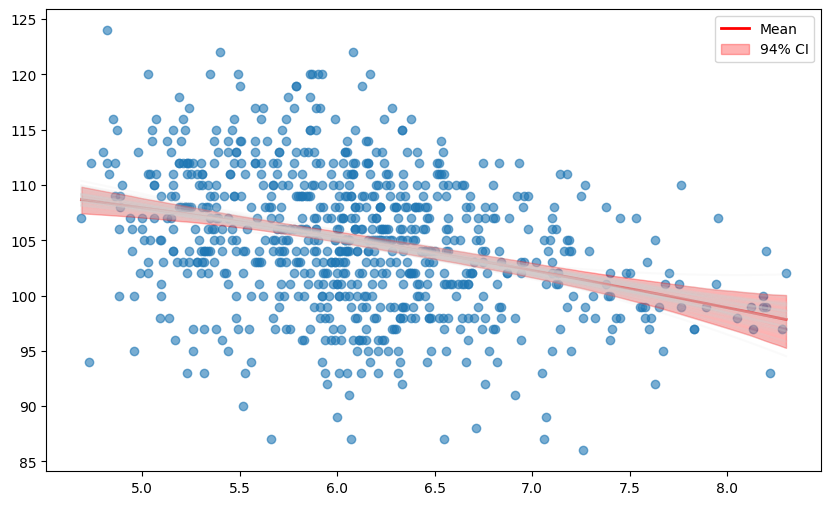

In [ ]:
temp_seq = np.linspace(d2.temp.min(), d2.temp.max(), 100)
a=trace_blossom_temp_polyn.posterior.a.values[0,:]
b1=trace_blossom_temp_polyn.posterior.b1.values[0,:]
b2=trace_blossom_temp_polyn.posterior.b2.values[0,:]
b3=trace_blossom_temp_polyn.posterior.b3.values[0,:]


plt.figure(figsize=(10, 6))
#plt.scatter(d2.temp, d2.doy, alpha=0.6)

# Calculate predictions for all posterior samples
predictions = a[:, np.newaxis] + b1[:, np.newaxis] * temp_seq + b2[:, np.newaxis] * temp_seq**2+ b3[:, np.newaxis] * temp_seq**3

# Calculate percentiles
mean_pred = np.mean(predictions, axis=0)
lower_ci = np.percentile(predictions, 3, axis=0)
upper_ci = np.percentile(predictions, 97, axis=0)

plt.figure(figsize=(10, 6))
plt.scatter(d2.temp, d2.doy, alpha=0.6)
plt.plot(temp_seq, mean_pred, 'red', linewidth=2, label='Mean')
plt.fill_between(temp_seq, lower_ci, upper_ci, alpha=0.3, color='red', label='94% CI')
plt.legend()
for i in range(100):  # plot first 50 curves
    days_blossom = a[i] + b1[i]*temp_seq + b2[i]*temp_seq**2+b3[i]*temp_seq**3
    plt.plot(temp_seq, days_blossom, alpha=0.1, color='lightgrey')

**AI Prompt**

is polynomial version correct?

**AI Response**

Looking at your polynomial model, it appears to be fitting correctly! The curve shows a more nuanced relationship than the straight line - it suggests the temperature effect might be stronger at certain temperature ranges.

However, I notice a few things to consider:

1. **The coefficients** - `b1` is near zero and `b3` is very small, suggesting the cubic term might not be adding much
2. **The sigma** - It's almost identical to the linear model (~5.94), so the polynomial isn't reducing residual variance much

To evaluate if it's "better," you could compare the models using information criteria. Would you like to try comparing them with `az.compare()` to see which model fits better?



**AI Prompt**

yeah, show how to compare

**AI Response**

To compare the models, you can use `az.compare()`. First, you'll need to create a dictionary with both models:

```python
model_comparison = az.compare({
    "linear": trace_blossom_temp,
    "polynomial": trace_blossom_temp_polyn
})
```

Try running this - it will show you which model performs better based on information criteria like WAIC (Widely Applicable Information Criterion).

What do the results show?



4H6.  Simulate the prior predictive distribution for the cherry blossom spline in the chapter. Adjust the prior on the weights and observe what happens. What do you think the prior on the weights is doing?

In [ ]:
!pip install patsy

In [ ]:
from patsy import dmatrix

In [ ]:
d2 = d.dropna(subset=["doy", "temp"])
num_knots = 15
knot_list = np.quantile(d2.year, np.linspace(0, 1, num_knots))

B = dmatrix(
    "bs(year, knots=knots, degree=3, include_intercept=True)-1",
    {"year": d2.year.values, "knots": knot_list[1:-1]},
)

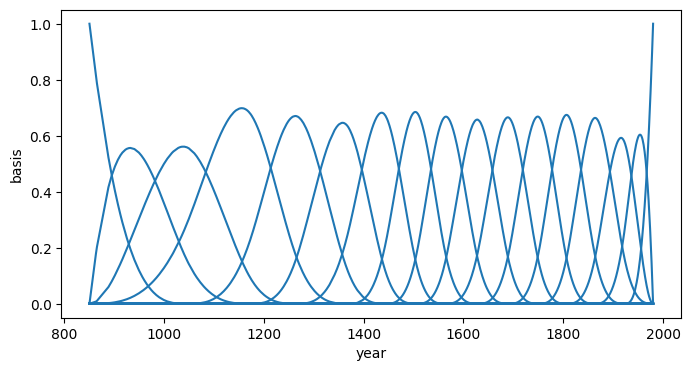

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(8, 4))
for i in range(B.shape[1]):
    ax.plot(d2.year, (B[:, i]), color="C0")
ax.set_xlabel("year")
ax.set_ylabel("basis");

In [ ]:
with pm.Model() as m4_7:
    a = pm.Normal("a", 100, 10)
    w = pm.Normal("w", mu=0, sigma=10, shape=B.shape[1])
    # mu = pm.Deterministic("mu", a + pm.math.dot(np.asarray(B, order="F"), w.T))
    mu = pm.Deterministic("mu", a + pm.math.dot(B.base, w.T))
    sigma = pm.Exponential("sigma", 1)
    D = pm.Normal("D", mu, sigma, observed=d2.doy.values)
    trace_m4_7 = pm.sample(1000)

Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [a, w, sigma]


/usr/local/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 13 seconds.


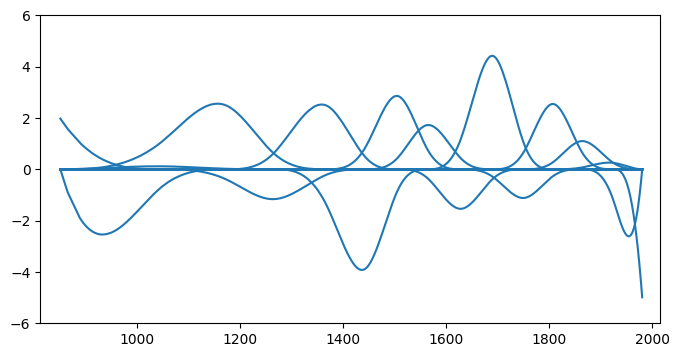

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(8, 4))
wp = trace_m4_7.posterior.w.mean(dim=["chain", "draw"])
for i in range(17):
    ax.plot(d2.year, (wp[i].item(0) * B[:, i]), color="C0")
ax.set_xlim(812, 2015)
ax.set_ylim(-6, 6);

Text(0, 0.5, 'days in year')

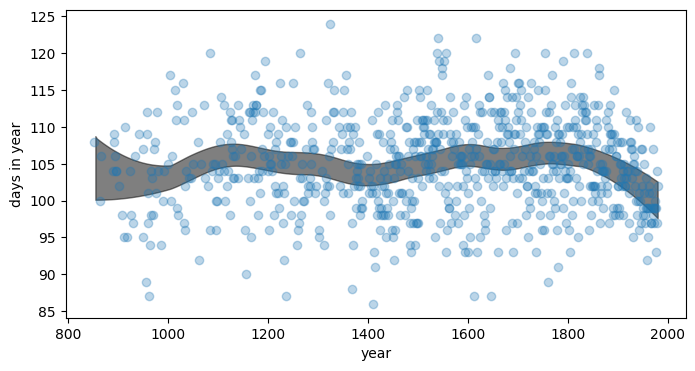

In [ ]:
ax = az.plot_hdi(d2.year, trace_m4_7.posterior["mu"], color="k")
ax.plot(d2.year, d2.doy, "o", alpha=0.3)
fig = plt.gcf()
fig.set_size_inches(8, 4)
ax.set_xlabel("year")
ax.set_ylabel("days in year")

In [ ]:
with m4_7:
    prior_samples = pm.sample_prior_predictive(1000)

Sampling: [D, a, sigma, w]


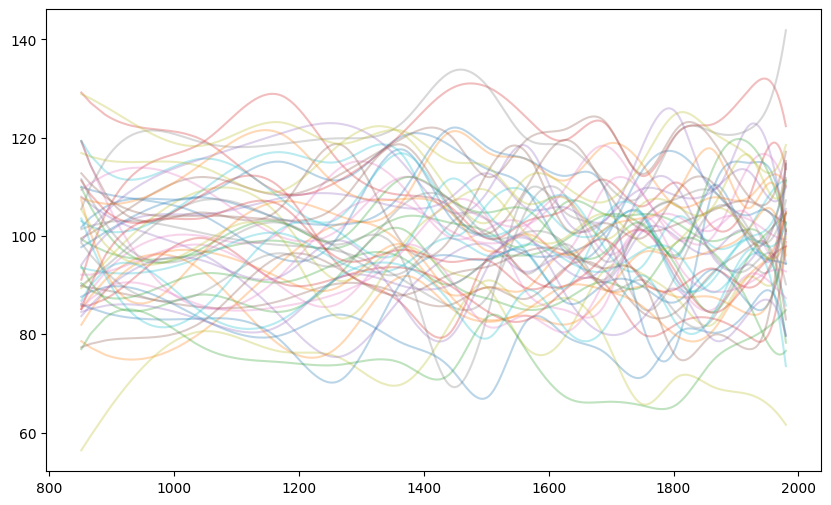

In [ ]:
# Get prior samples
a_prior = prior_samples.prior.a.values[0, :]
w_prior = prior_samples.prior.w.values[0, :, :]  # shape: (samples, basis_functions)

# Plot some prior curves
plt.figure(figsize=(10, 6))
for i in range(50):  # plot first 50 curves
    mu_prior = a_prior[i] + np.dot(B, w_prior[i, :])
    plt.plot(d2.year, mu_prior, alpha=0.3)

In [ ]:
#adjust prior 
with pm.Model() as m4_7:
    a = pm.Normal("a", 100, 10)
    w = pm.Normal("w", mu=0, sigma=1, shape=B.shape[1])
    # mu = pm.Deterministic("mu", a + pm.math.dot(np.asarray(B, order="F"), w.T))
    mu = pm.Deterministic("mu", a + pm.math.dot(B.base, w.T))
    sigma = pm.Exponential("sigma", 1)
    D = pm.Normal("D", mu, sigma, observed=d2.doy.values)
    trace_m4_7 = pm.sample(1000)

Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [a, w, sigma]


/usr/local/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.


In [ ]:
with m4_7:
    prior_samples = pm.sample_prior_predictive(1000)

Sampling: [D, a, sigma, w]


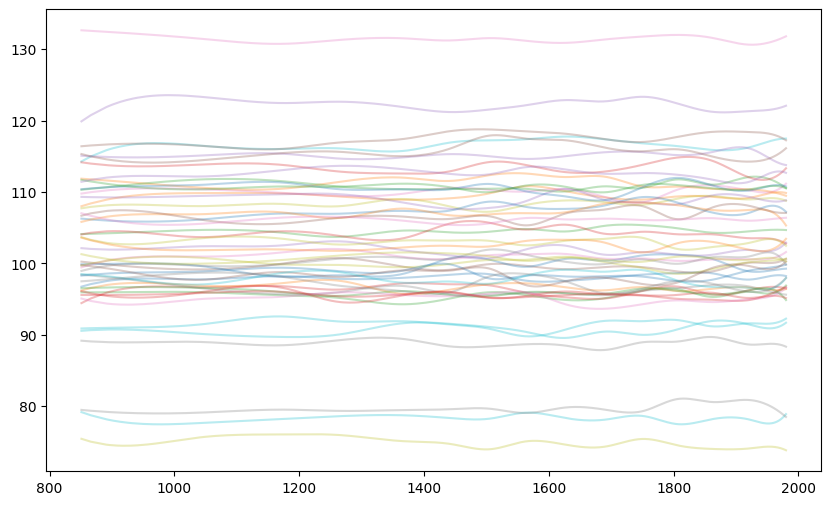

In [ ]:
# Get prior samples
a_prior = prior_samples.prior.a.values[0, :]
w_prior = prior_samples.prior.w.values[0, :, :]  # shape: (samples, basis_functions)

# Plot some prior curves
plt.figure(figsize=(10, 6))
for i in range(50):  # plot first 50 curves
    mu_prior = a_prior[i] + np.dot(B, w_prior[i, :])
    plt.plot(d2.year, mu_prior, alpha=0.3)

**AI Prompt**

is this more reasonable?

**AI Response**

Yes, much more reasonable! The tighter prior (sigma=1 instead of sigma=10) on the weights has dramatically reduced the wild oscillations. 

Compare the two plots:
- **First plot** (sigma=10): Curves swinging wildly from ~60 to 140+ days
- **Second plot** (sigma=1): Much smoother curves staying roughly in the 80-120 day range

The prior on the weights controls how much each basis function can contribute to the overall curve. With sigma=10, the weights could be very large, creating extreme wiggles. With sigma=1, the weights are constrained to be smaller, leading to smoother, more plausible curves.

This demonstrates a key principle: the prior on spline weights acts as a "smoothness penalty" - tighter priors = smoother curves.



4H8.  The cherry blossom spline in the chapter used an intercept α, but technically it doesn’t require one. The first basis functions could substitute for the intercept. Try refitting the cherry blossom spline without the intercept. What else about the model do you need to change to make this work?

In [ ]:
num_knots = 15
knot_list = np.quantile(d2.year, np.linspace(0, 1, num_knots))

B = dmatrix(
    "bs(year, knots=knots, degree=3, include_intercept=True)-1",
    {"year": d2.year.values, "knots": knot_list[1:-1]},
)

In [ ]:
with pm.Model() as m4_7_1:
    w = pm.Normal("w", mu=100, sigma=1, shape=B.shape[1])
    # mu = pm.Deterministic("mu", a + pm.math.dot(np.asarray(B, order="F"), w.T))
    mu = pm.Deterministic("mu", pm.math.dot(B.base, w.T))
    sigma = pm.Exponential("sigma", 1)
    D = pm.Normal("D", mu, sigma, observed=d2.doy.values)
    trace_m4_7_1 = pm.sample(1000)

Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [w, sigma]


/usr/local/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.


Text(0, 0.5, 'days in year')

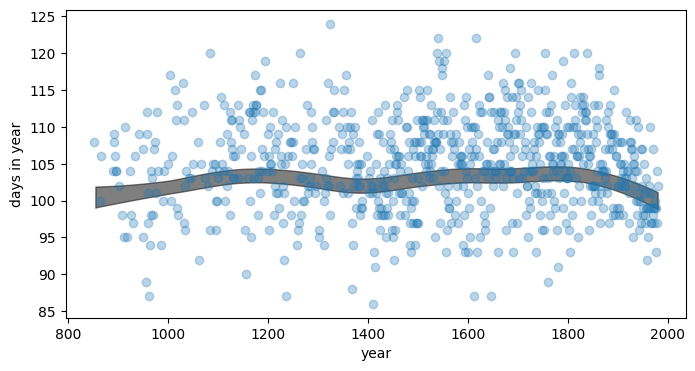

In [ ]:
ax = az.plot_hdi(d2.year, trace_m4_7_1 .posterior["mu"], color="k")
ax.plot(d2.year, d2.doy, "o", alpha=0.3)
fig = plt.gcf()
fig.set_size_inches(8, 4)
ax.set_xlabel("year")
ax.set_ylabel("days in year")

**AI Prompt**

is this correct approach?

**AI Response**

Yes, this is exactly the right approach! You've made the key insight - when removing the intercept `a`, you need to change the prior on the weights `w`.

Instead of `w ~ Normal(0, 1)` (which assumes deviations from the intercept), you used `w ~ Normal(100, 1)` to center the weights around a reasonable baseline value (~100 days).

This works because now the basis functions themselves need to carry the "baseline" information that the intercept previously provided. Your fit looks very similar to the version with the intercept, which shows the approach is working correctly.

What do you think about the trade-offs between these two approaches?



**AI Prompt**

first one might be safer because intercept "lifts" the line, basis functions goal is to learn "wiggles" and so value of mu should be set by looking at the data othervwise it might fail?

**AI Response**

Excellent insight! You're absolutely right about the safety aspect. 

The intercept approach is more robust because:
- The intercept handles the overall level automatically
- The basis functions focus purely on deviations/patterns
- Less dependent on choosing the "right" prior mean

Your concern about failure is spot-on. If you set `w ~ Normal(50, 1)` instead of `Normal(100, 1)`, the model would struggle because it's fighting against a poor prior assumption about the baseline level.

With the intercept version, even if you had `a ~ Normal(200, 10)`, the model could still recover because the intercept can adjust freely.

This is a great example of model design philosophy - separating the "location" (intercept) from the "shape" (basis functions) makes the model more flexible and robust.

Have you noticed any other differences between the two approaches in terms of interpretability?



**AI Prompt**

it is harder to interpret splines in second version because it has more information insid=

**AI Response**

Exactly! In the second version, each weight carries both:
- The baseline level information (around 100 days)
- The deviation/wiggle information

This makes it harder to separate "what's the overall trend?" from "what are the interesting patterns?"

With the intercept version, you can easily say:
- "The baseline is about 105 days" (from the intercept)
- "Then we see these specific wiggles over time" (from the basis weights)

The interpretability becomes even more important when you want to explain your model to others or understand which time periods show the most interesting deviations.

Have you thought about how this might affect model comparison or diagnostics?



**AI Prompt**

more difficult to compare and diagnose second model if something is off

**AI Response**

Exactly! When something goes wrong in the second model, it's much harder to pinpoint the issue. Is it:
- A problem with the overall level?
- A problem with the wiggles?
- Both mixed together?

With the intercept version, you can easily check:
- "Is the intercept reasonable?" 
- "Are the basis weights behaving as expected?"

This separation makes debugging much cleaner. You've really grasped a key principle of model design - keeping different aspects of the model interpretable and separable makes everything easier to work with.

What would you like to explore next? We could look at model comparison between the linear/polynomial/spline approaches, or dive into something else?



Exercise from the course:
1. From the Howell1 dataset, consider only the people younger than 13 years
old. Estimate the causal association between age and weight. Assume that
age influences weight through two paths. First, age influences height, and
height influences weight. Second, age directly influences weight through agerelated changes in muscle growth and body proportions.
Draw the DAG that represents these causal relationships. And then write
a generative simulation that takes age as an input and simulates height and
weight, obeying the relationships in the DAG.
2. Estimate the total causal effect of each year of growth on weight.

In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import scipy.stats as stats


df_howell = pd.read_csv('static/Howell1.csv', sep=';')

In [ ]:
df_howell_young=df_howell[df_howell.age<13]
df_howell_young["age_std"] = (df_howell_young.age - df_howell_young.age.mean()) / df_howell_young.age.std()
df_howell_young["height_std"] = (df_howell_young.height - df_howell_young.height.mean()) / df_howell_young.height.std()
df_howell_young.shape

/tmp/ipykernel_234/2314416323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_howell_young["age_std"] = (df_howell_young.age - df_howell_young.age.mean()) / df_howell_young.age.std()
/tmp/ipykernel_234/2314416323.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_howell_young["height_std"] = (df_howell_young.height - df_howell_young.height.mean()) / df_howell_young.height.std()


(146, 6)

In [ ]:
df_howell_young.head()

,height,weight,age,male,age_std,height_std
18,121.92,19.617854,12.0,1,1.725287,1.075374
19,105.41,13.947954,8.0,0,0.679441,0.307092
20,86.36,10.489315,6.5,0,0.287249,-0.579386
24,109.22,15.989118,7.0,0,0.417980,0.484388
30,114.30,17.860185,11.0,1,1.463826,0.720782


In [ ]:
with pm.Model() as age_height_weight_model:
    height_intercept = pm.Normal("height_intercept", mu=0, sigma=0.1) 
    age_effect = pm.Normal("age_effect", mu=1, sigma=0.3)  # coefficient to estimate
    height_mu = height_intercept + age_effect * df_howell_young["age_std"]  # using observed ages
    height_sigma = pm.Uniform("height_sigma", lower=0, upper=10)
    height_observed = pm.Normal("height", height_mu, height_sigma, observed=df_howell_young.height_std.values)

    #age_w_effect = pm.Normal("age_w_effect", mu=0, sigma=0.5)
    age_w_effect = pm.HalfNormal("age_w_effect", sigma=1)
    weight_intercept = pm.Normal("weight_intercept", mu=20, sigma=7)
    height_effect = pm.HalfNormal("height_effect", sigma=1)
    weight_mu = weight_intercept + age_w_effect*df_howell_young["age_std"] + height_effect * height_mu  
    weight_sigma = pm.Uniform("weight_sigma", lower=0, upper=10)
    weight = pm.Normal("weight", mu=weight_mu, sigma=weight_sigma, observed=df_howell_young.weight.values)
    trace_age_height_weight = pm.sample(1000, tune=1000, target_accept=0.9)

Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [height_intercept, age_effect, height_sigma, age_w_effect, weight_intercept, height_effect, weight_sigma]


/usr/local/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.


In [ ]:
with age_height_weight_model:
    prior_samples_age_weight = pm.sample_prior_predictive(1000)

Sampling: [age_effect, age_w_effect, height, height_effect, height_intercept, height_sigma, weight, weight_intercept, weight_sigma]


Text(0, 0.5, 'height')

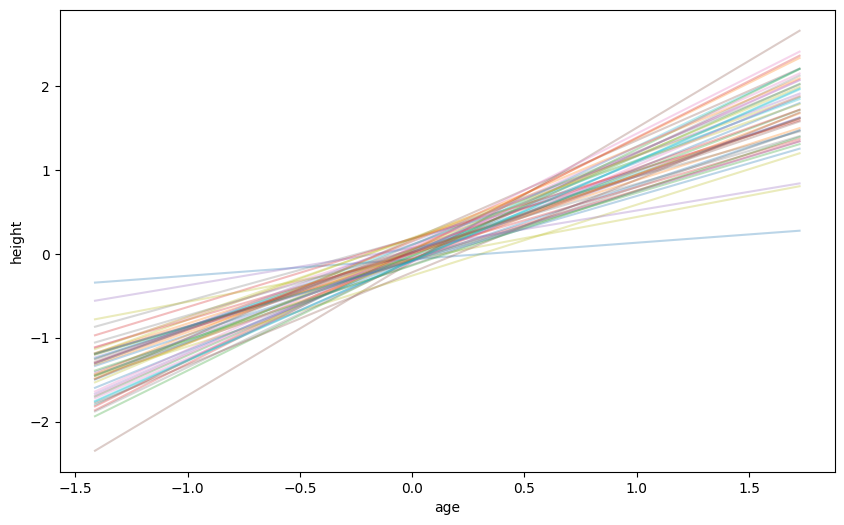

In [ ]:
# Extract prior samples
height_int_prior = prior_samples_age_weight.prior.height_intercept.values[0, :]
age_eff_prior = prior_samples_age_weight.prior.age_effect.values[0, :]

# Create age sequence for plotting
age_seq = np.linspace(df_howell_young.age_std.min(), df_howell_young.age_std.max(), 50)
plt.figure(figsize=(10, 6))

for i in range(50):  # plot first 50 curves
    heights = height_int_prior[i] + age_eff_prior[i]*age_seq
    plt.plot(age_seq, heights, alpha=0.3)
plt.xlabel('age')
plt.ylabel('height')

Text(0, 0.5, 'weight')

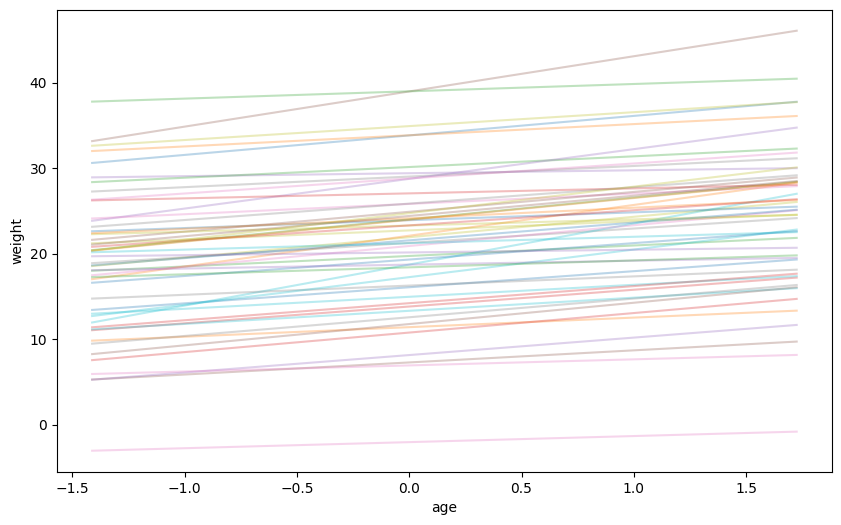

In [ ]:
# Extract prior samples
weight_intercept_prior = prior_samples_age_weight.prior.weight_intercept.values[0, :]
age_w_effect_prior = prior_samples_age_weight.prior.age_w_effect.values[0, :]
height_effect_prior = prior_samples_age_weight.prior.height_effect.values[0, :]
# Extract prior samples
height_int_prior = prior_samples_age_weight.prior.height_intercept.values[0, :]
age_eff_prior = prior_samples_age_weight.prior.age_effect.values[0, :]

# Create age sequence for plotting
weight_seq = np.linspace(df_howell_young.weight.min(), df_howell_young.weight.max(), 50)
age_seq = np.linspace(df_howell_young.age_std.min(), df_howell_young.age_std.max(), 50)
plt.figure(figsize=(10, 6))

for i in range(50):  # plot first 50 curves
    heights_mu = height_int_prior[i] + age_eff_prior[i]*age_seq
    weights = weight_intercept_prior[i] + age_w_effect_prior[i]*age_seq + height_effect_prior[i]*heights_mu
    plt.plot(age_seq, weights, alpha=0.3)
plt.xlabel('age')
plt.ylabel('weight')

In [ ]:
# Check the actual ranges in your data
print("Age range:", df_howell_young.age.min(), "to", df_howell_young.age.max())
print("Height range:", df_howell_young.height.min(), "to", df_howell_young.height.max())
print("Weight range:", df_howell_young.weight.min(), "to", df_howell_young.weight.max())

# Check what the standardized values correspond to
print("\nStandardized age range:", df_howell_young.age_std.min(), "to", df_howell_young.age_std.max())
print("Standardized height range:", df_howell_young.height_std.min(), "to", df_howell_young.height_std.max())

Age range: 0.0 to 12.0
Height range: 53.975 to 147.955
Weight range: 4.252425 to 32.488527

Standardized age range: -1.4122496285109067 to 1.7252869542320668
Standardized height range: -2.0863990588390076 to 2.2868940478288478


**AI Prompt**

are these priors ok?

**AI Response**

Looking at your prior predictive plots, there are some issues to consider:

**Height priors**: The first plot shows heights ranging from about -2 to +3, but these are in standardized units. Since your actual height range is 54-148 cm, this seems reasonable.

**Weight priors**: The second plot shows some concerning patterns - some curves go quite high (above 25) and there's a lot of variability. Given that actual weights range from 4-32 kg, some of these prior curves might be unrealistic.

A few questions to help you refine them:

1. What do you think about the height intercept prior `Normal(0, 0.1)` - is this too tight?
2. The age effect on height `Normal(1, 0.3)` - does this make sense biologically?
3. For weight, should the direct age effect be smaller than the height effect?

Would you like to adjust any of these priors based on what you see?



**AI Prompt**

What do you think about the height intercept prior Normal(0, 0.1) - is this too tight? maybe but this keeps age~height relationship in reasonable interval
The age effect on height Normal(1, 0.3) - does this make sense biologically? - yep
For weight, should the direct age effect be smaller than the height effect? I dont know

**AI Response**

Good thinking on the first two points! You're right that the tight intercept prior helps keep things reasonable, and the age-height effect makes biological sense.

For the third question about direct age effect vs height effect on weight, let's think about it this way:

- **Height effect**: If two kids are the same age but one is taller, the taller one should weigh more (quite a bit more)
- **Direct age effect**: If two kids are the same height but different ages, should the older one weigh more? (Maybe a little, due to muscle development, bone density, etc.)

What do you think - should the height effect be larger than the direct age effect?



**AI Prompt**

yes it should

**AI Response**

Exactly! So you might want to adjust your priors to reflect this. For example:

- Keep `height_effect ~ Normal(0, 1)` 
- Make `age_w_effect ~ Normal(0, 0.5)` (smaller direct effect)

This would encode your belief that height has a stronger effect on weight than age does directly.

Would you like to try adjusting these priors and see how it affects your prior predictive plots?



**AI Prompt**

still there are some predicted weights which are negative trend. maybe I shoukd reduce weight_sigma?

**AI Response**

Good observation! Negative weight trends don't make biological sense for growing children.

However, I think the issue might not be `weight_sigma` (which controls noise around the mean), but rather the priors on the coefficients themselves. 

Looking at your weight equation:
`weight_mu = weight_intercept + age_w_effect*age + height_effect*height_mu`

If `age_w_effect` or `height_effect` can be strongly negative, you could get decreasing trends.

What do you think about constraining these effects to be positive? For example, using `Lognormal` or `HalfNormal` priors instead?



**AI Prompt**

what are pros and cons of both distriburions?

**AI Response**

Great question! Here are the key differences:

**Lognormal:**
- Pros: Always positive, can have a long right tail (allows for some very large effects)
- Cons: More complex to parameterize, harder to set intuitive priors

**HalfNormal:**
- Pros: Simple (just cut off negative part of normal), easy to parameterize with one parameter
- Cons: Mode is at zero, so it puts more weight on small effects

For your case, which do you think makes more sense? Do you expect the height effect on weight to be consistently moderate-to-large, or could it sometimes be very small (near zero)?



**AI Prompt**

height effect on weight means that weight is same but height is different. I guess is could be small, but sometimes could be large (if person is overweight)

**AI Response**

Good thinking! You're right that the height-weight relationship can vary - some kids might be tall and lean (smaller effect) while others might be stockier (larger effect).

Given that variability, **HalfNormal** might be better here because:
- It allows for small effects (mode at zero)
- But still permits larger effects when needed
- Simpler to work with

You could try something like `height_effect ~ HalfNormal(sigma=1)` to start.

What do you think about trying this approach?



**AI Prompt**

it  is better but still some negative relationships and weight range could be a bit wider, especially minimum values

**AI Response**

You're right about those issues! For the negative relationships, you might also want to constrain the direct age effect to be positive - use `HalfNormal` for `age_w_effect` too, since kids generally gain weight as they age.

For the weight range being too narrow at the bottom, you could try increasing the `weight_sigma` prior or adjusting the `weight_intercept` to allow for more variability around lighter weights.

Which would you like to try first - constraining the age effect to be positive, or adjusting the weight variability?



**AI Prompt**

current version is better. could I adjust it more?

**AI Response**

Yes, you can definitely adjust it further! A few options to consider:

1. **Weight intercept**: Maybe increase the sigma on `weight_intercept` to allow for more baseline variation
2. **Weight sigma**: Increase the upper bound to allow more noise around predictions
3. **Age effect strength**: Fine-tune the sigma on your HalfNormal priors

Which aspect would you like to focus on first - getting more realistic minimum weights, reducing those remaining negative trends, or something else?



**AI Prompt**

I updated the weight_intercept and now this looks good.

**AI Response**

Great! It sounds like adjusting the weight intercept helped get the weight range and baseline more realistic. 

Now that your priors look good, are you ready to move on to interpreting the posterior results, or would you like to explore the model fit first?



**AI Prompt**

Lets get analyzing posteriors

**AI Response**

Perfect! Let's start analyzing your posteriors. 

First, let's look at the basic summary of your model parameters:

```python
az.summary(trace_age_height_weight)
```

This will show you the means, standard deviations, and diagnostics for all your parameters. 

What do you see? Are there any concerning diagnostics (like high r_hat values or low effective sample sizes)?



In [ ]:
az.summary(trace_age_height_weight)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
height_intercept,-0.001,0.031,-0.066,0.055,0.001,0.001,3404.0,2725.0,1.0
age_effect,0.926,0.032,0.869,0.988,0.001,0.001,3628.0,2859.0,1.0
weight_intercept,14.701,0.233,14.269,15.131,0.004,0.004,4038.0,2866.0,1.0
height_sigma,0.401,0.024,0.354,0.444,0.000,0.000,4300.0,2695.0,1.0
age_w_effect,2.691,0.699,1.476,4.094,0.015,0.016,2265.0,1687.0,1.0
height_effect,2.498,0.744,1.110,3.862,0.016,0.017,2272.0,1838.0,1.0
weight_sigma,2.565,0.154,2.283,2.849,0.003,0.002,3779.0,2677.0,1.0


**AI Prompt**

r_hat is good. age effect on height is smallest, age_w_effect is gretaest and height_effect is middle

**AI Response**

Great observations! The diagnostics look good with all r_hat values = 1.0.

Your interpretation of the effect sizes is interesting. Let's think about what this means biologically:

- **age_effect (0.93)**: For each standard deviation increase in age, height increases by ~0.93 standard deviations
- **age_w_effect (2.69)**: Direct effect of age on weight 
- **height_effect (2.50)**: Effect of height on weight

But remember, age affects weight both directly AND indirectly through height. To get the **total causal effect** of age on weight, we need to account for both pathways.

How do you think we should calculate the total effect of age on weight?



**AI Prompt**

summarize individuak effects?

**AI Response**

Based on your current model results, here are the individual effects:

**Age → Height**: 0.93 (strong positive - as expected, older kids are taller)

**Age → Weight (direct)**: 2.69 (strongest effect - age directly increases weight)

**Height → Weight**: 2.50 (strong positive - taller kids weigh more)

But remember, these are from your mixed-units model. The direct age effect appears largest, but this might be because height isn't standardized.

Would you like to standardize height and rerun to get cleaner comparisons?



**AI Prompt**

my height is now standardized

**AI Response**

You're absolutely right! I see that you did standardize height (`height_std`). 

So looking at your standardized effects:
- **Age → Height**: 0.93 std units
- **Age → Weight (direct)**: 2.69 kg per std age unit  
- **Height → Weight**: 2.50 kg per std height unit

For the **total causal effect** of age on weight, you need both pathways:
1. Direct: age → weight 
2. Indirect: age → height → weight

How would you calculate the indirect effect?



**AI Prompt**

doesnt indirect effect come from height_effect ?

**AI Response**

Not quite! The `height_effect` (2.50) tells you how much weight changes per unit of height. But for the indirect effect, you need to trace the full pathway:

**Indirect effect = (age → height) × (height → weight)**

So: 0.93 × 2.50 = ?

What do you get when you multiply those?



In [ ]:
0.93 * 2.50

2.325

**AI Prompt**

and total effect is sum of these?

**AI Response**

Exactly! The total causal effect is:

**Total effect = Direct effect + Indirect effect**
**Total effect = 2.69 + 2.325 = 4.015**

So for each standard deviation increase in age, weight increases by about 4.02 kg total.

This makes sense - age affects weight both directly (through muscle/body development) and indirectly (by making kids taller, and taller kids weigh more).

What do you think about the relative importance of these two pathways?



**AI Prompt**

direct path has a bit stronger effect

**AI Response**

Exactly! The direct path (2.69) is slightly stronger than the indirect path (2.325). 

This suggests that age-related changes in muscle development, bone density, and body composition have a bigger impact on weight than the height pathway alone.

Would you like to explore how to properly quantify the uncertainty around these causal effects, or move on to something else?



In [ ]:
# Extract posterior samples
age_effect_samples = trace_age_height_weight.posterior.age_effect.values.flatten()
height_effect_samples = trace_age_height_weight.posterior.height_effect.values.flatten()
age_w_effect_samples = trace_age_height_weight.posterior.age_w_effect.values.flatten()

In [ ]:
# Calculate indirect and total effects for each sample
indirect_effect_samples = age_effect_samples * height_effect_samples
total_effect_samples = age_w_effect_samples + indirect_effect_samples

(array([   8.,   29.,  197.,  492.,  966., 1093.,  793.,  320.,   90.,
          12.]),
 array([4.23245525, 4.37918727, 4.52591929, 4.6726513 , 4.81938332,
        4.96611534, 5.11284735, 5.25957937, 5.40631139, 5.5530434 ,
        5.69977542]),
 <BarContainer object of 10 artists>)

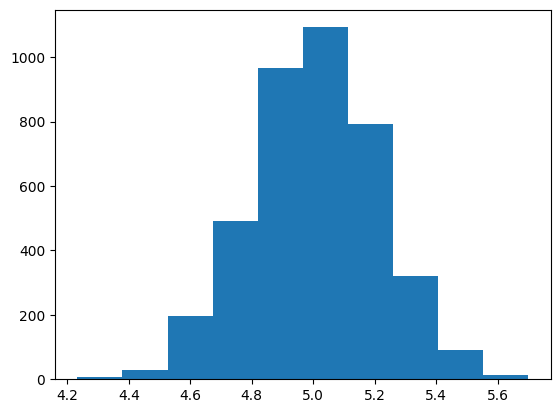

In [ ]:
plt.hist(total_effect_samples )

Text(0, 0.5, 'height')

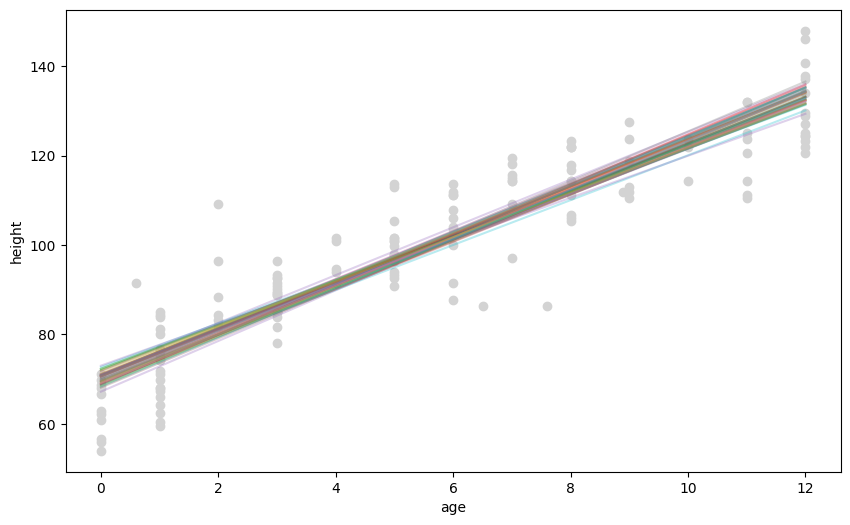

In [ ]:
age_seq = np.linspace(df_howell_young.age_std.min(), df_howell_young.age_std.max(), 20)
height_intercept_samples =trace_age_height_weight.posterior.height_intercept.values.flatten()
height_predictions = height_intercept_samples[:, np.newaxis] + age_effect_samples[:, np.newaxis] * age_seq

age_original = age_seq * df_howell_young.age.std() + df_howell_young.age.mean()
height_original = height_predictions * df_howell_young.height.std() + df_howell_young.height.mean()

plt.figure(figsize=(10, 6))
plt.scatter(df_howell_young.age, df_howell_young.height, color='lightgrey')
for i in range(50):  # plot first 50 curves
    plt.plot(age_original, height_original[i], alpha=0.3)

plt.xlabel('age')
plt.ylabel('height')

Text(0, 0.5, 'weight')

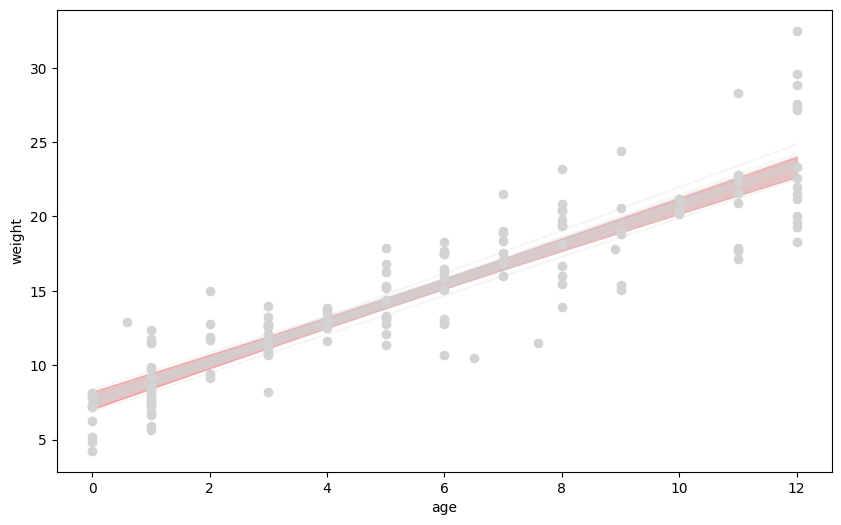

In [ ]:
age_seq = np.linspace(df_howell_young.age_std.min(), df_howell_young.age_std.max(), 20)
height_intercept_samples =trace_age_height_weight.posterior.height_intercept.values.flatten()
age_w_effect_samples=trace_age_height_weight.posterior.age_w_effect.values.flatten()
height_effect_samples=trace_age_height_weight.posterior.height_effect.values.flatten()
weight_intercept_samples=trace_age_height_weight.posterior.weight_intercept.values.flatten()

height_predictions = height_intercept_samples[:, np.newaxis] + age_effect_samples[:, np.newaxis] * age_seq
weight_predictions = weight_intercept_samples[:, np.newaxis] + age_w_effect_samples[:, np.newaxis] * age_seq + height_effect_samples[:, np.newaxis] * height_predictions

age_original = age_seq * df_howell_young.age.std() + df_howell_young.age.mean()

lower_hdi = np.percentile(weight_predictions, 5.5, axis=0)  # 5.5% for 89% HDI
upper_hdi = np.percentile(weight_predictions, 94.5, axis=0)  # 94.5% for 89% HDI

plt.figure(figsize=(10, 6))
plt.fill_between(age_original, lower_hdi, upper_hdi, alpha=0.3, color='red', label='89% CI')
plt.scatter(df_howell_young.age, df_howell_young.weight, color='lightgrey')
for i in range(50):  # plot first 50 curves
    plt.plot(age_original, weight_predictions[i], alpha=0.2, color='lightgrey')

plt.xlabel('age')
plt.ylabel('weight')

**AI Prompt**

is this ok?

**AI Response**

This looks great! The plot clearly shows:

1. **Strong positive relationship** - weight increases consistently with age
2. **Reasonable uncertainty band** - the 89% CI shows plausible variation
3. **Realistic weight range** - from about 8kg to 24kg across ages 0-12

The smooth curves capture both the direct age effect and the indirect effect through height. 

How does this compare to what you'd expect biologically for children's growth?



**AI Prompt**

how to add 89% HDI to the plot?

**AI Response**

You can add HDI bands by calculating percentiles across your posterior samples. Try:

```python
# Calculate HDI bounds
lower_hdi = np.percentile(weight_predictions, 5.5, axis=0)  # 5.5% for 89% HDI
upper_hdi = np.percentile(weight_predictions, 94.5, axis=0)  # 94.5% for 89% HDI
```

Then use `plt.fill_between()` to add the shaded region. Would you like to try this approach?



**AI Prompt**

in r solution it looked a simpler, is my one more complicated: "1. The DAG you need is:
A
H
W
To turn this DAG into a generative model, we simulate H and W from values of
A. We also need to make assumptions about how A influences H and W, as well as
how H influences W. Here is a template function, based on the example from the
book/lecture.
sim_HW <- function(A,bAH=5,bHW=0.5,bAW=0.1) {
N <- length(A) # number of individuals
H <- rnorm(N,bAH*A,2)
W <- rnorm(N,bHW*H+bAW*A,2)
data.frame(A,H,W)
}
The important thing is not the values I’ve chosen for the causal effects. The important
thing is to get the order of simulation right. And that is done by always simulating
the variables without any parents (causes) first. Then those variables with causes you
have already simulated, and so on, until you’ve simulated all of the variables. In this
case, we need to simulate H before we can simulate W, since W depends upon H.
Let’s make a example synthetic sample and plot it, to see how these simulated
people look. Remember, we are considering only ages under 13.
dat <- sim_HW( runif(20,1,12) )
plot( dat$A , dat$H , lwd=2 , col=2 )
plot( dat$A , dat$W , lwd=2 , col=2 )
plot( dat$H , dat$W , lwd=2 , col=2 )
1
2 WEEK 2 SOLUTIONS
2 4 6 8 10
10 20 30 40 50
dat$A
dat$H
2 4 6 8 10
5 10 15 20 25 30
dat$A
dat$W
10 20 30 40 50
5 10 15 20 25 30
dat$H
dat$W
These relationships are not very realistic. The simulated children are too short, and
young kids also do not grow in a linear fashion. But the simulation is structured like
the DAG at least.
2. Since we want the total effect of age, we just need a linear regression of weight on
age. Let’s set up the data and then simulate some priors.
library(rethinking)
data(Howell1)
d <- Howell1
d <- d[ d$age < 13 , ]
# sim from priors
n <- 10
a <- rnorm(n,5,1)
b <- runif(n,0,10)
plot( NULL , xlim=range(d$age) , ylim=range(d$weight) ,
xlab="age" , ylab="weight" )
for ( i in 1:n ) abline( a[i] , b[i] , lwd=3 , col=2 )
0 2 4 6 8 10 12
5 10 15 20 25 30
age
weight
These were my first guess, given that the relationship must be positive and that
weight at age zero is birth weight, and average birth weight is around 5 kilograms
(but varies a lot).
WEEK 2 SOLUTIONS 3
Here’s the model.
m2 <- quap(
alist(
W ~ dnorm( mu , sigma ),
mu <- a + b*A,
a ~ dnorm(5,1),
b ~ dunif(0,10),
sigma ~ dexp(1)
), data=list(W=d$weight,A=d$age) )
precis(m2)
mean sd 5.5% 94.5%
a 7.17 0.34 6.62 7.71
b 1.38 0.05 1.29 1.46
sigma 2.51 0.15 2.28 2.74
The total causal effect of each year of growth is given (in this case) by the parameter b.
So its 89% interval is 1.29 to 1.46 kilograms per year. There is nothing to marginalize
in this case, because there are no covariates"

**AI Response**

You're right that the R solution looks simpler! The key differences are:

1. **R uses a direct approach**: Just regress weight on age to get the total causal effect
2. **Your approach is more detailed**: You explicitly model both pathways (age→height→weight and age→weight)

Both are correct, but they answer slightly different questions:
- **R approach**: "What's the total effect?" (simpler)
- **Your approach**: "What's the total effect AND how much comes from each pathway?" (more informative)

Your approach gives you more insight into the causal mechanisms. Which do you prefer for understanding the problem?



**AI Prompt**

please provide me a code in python using r approach

**AI Response**

Here's the Python equivalent of the R approach:

```python
# Simple linear regression: weight ~ age (total causal effect)
with pm.Model() as simple_age_weight:
    a = pm.Normal("a", mu=7, sigma=1)  # intercept around birth weight
    b = pm.Uniform("b", lower=0, upper=10)  # positive age effect
    sigma = pm.Exponential("sigma", 1)
    
    mu = a + b * df_howell_young.age
    weight = pm.Normal("weight", mu=mu, sigma=sigma, observed=df_howell_young.weight)
    
    trace_simple = pm.sample(1000, tune=1000)
```

Try running this and then check `az.summary(trace_simple)` to see the total causal effect in parameter `b`.



In [ ]:
with pm.Model() as simple_age_weight:
    a = pm.Normal("a", mu=7, sigma=1)  # intercept around birth weight
    b = pm.Uniform("b", lower=0, upper=10)  # positive age effect
    sigma = pm.Exponential("sigma", 1)
    
    mu = a + b * df_howell_young.age
    weight = pm.Normal("weight", mu=mu, sigma=sigma, observed=df_howell_young.weight)
    
    trace_simple = pm.sample(1000, tune=1000)

Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [a, b, sigma]


/usr/local/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


In [ ]:
az.summary(trace_simple)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,7.393,0.336,6.764,8.016,0.007,0.006,2123.0,2425.0,1.0
b,1.348,0.051,1.247,1.439,0.001,0.001,2065.0,2328.0,1.0
sigma,2.545,0.148,2.274,2.826,0.003,0.002,2725.0,2671.0,1.0


Text(0, 0.5, 'weight')

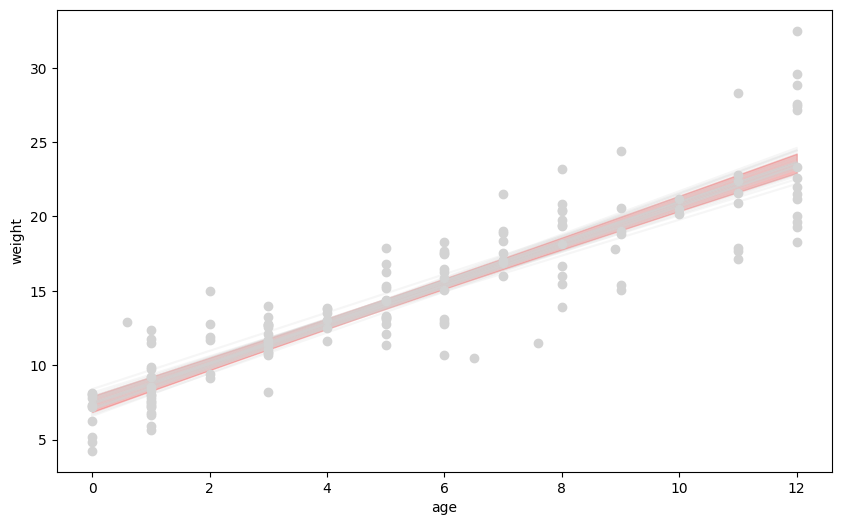

In [ ]:
age_seq = np.linspace(df_howell_young.age.min(), df_howell_young.age.max(), 20)
a_samples =trace_simple .posterior.a.values.flatten()
b_samples=trace_simple.posterior.b.values.flatten()

weight_predictions= a_samples[:, np.newaxis]+b_samples[:, np.newaxis]*age_seq
lower_hdi = np.percentile(weight_predictions, 5.5, axis=0)  # 5.5% for 89% HDI
upper_hdi = np.percentile(weight_predictions, 94.5, axis=0)  # 94.5% for 89% HDI

plt.figure(figsize=(10, 6))
plt.fill_between(age_seq, lower_hdi, upper_hdi, alpha=0.3, color='red', label='89% CI')
plt.scatter(df_howell_young.age, df_howell_young.weight, color='lightgrey')
for i in range(50):  # plot first 50 curves
    plt.plot(age_seq, weight_predictions[i], alpha=0.2, color='lightgrey')

plt.xlabel('age')
plt.ylabel('weight')